In [29]:
# !pip install langgraph
#pip install "nbconvert[webpdf]"
# !pip install ipython


In [12]:
from langgraph.graph import StateGraph
from typing import Dict, Any
from IPython.display import Image, display
from typing import TypedDict

In [39]:
def lemon_scuice(state: Dict[str,Any] )-> Dict[str,Any]:
    get_lemon=state.get('lemons',0)
    state['juice']=f'Get juice from {get_lemon} lemons'
    return state

def mix_sugar_water(state: Dict[str,Any])->Dict[str,Any]:
    get_sugar=state.get('sugar',0)
    get_water=state.get('water',0)
    get_juice=state.get('juice',0)
    state['mix']=f'{get_juice} and add water {get_water} and sugar {get_sugar}'
    return state

def stir_and_serve(state: Dict[str,Any])->Dict[str,Any]:
    get_mix=state.get('mix',0)
    state['final']=f'get mix : {get_mix}--> Please serve to customer'
    return state

In [23]:
class LemonState(TypedDict):
    lemons:int
    juice:str
    mix: str
    sugar: int
    water: str
    final:str
    

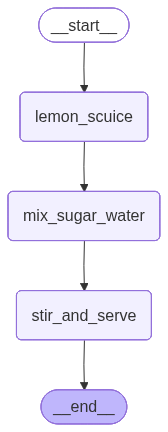

In [28]:
builder=StateGraph(LemonState)
builder.add_node('lemon_scuice',lemon_scuice)
builder.add_node('mix_sugar_water',mix_sugar_water)
builder.add_node('stir_and_serve',stir_and_serve)

builder.set_entry_point("lemon_scuice")
builder.add_edge("lemon_scuice","mix_sugar_water")
builder.add_edge("mix_sugar_water","stir_and_serve")
builder.set_finish_point('stir_and_serve')

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
initial_state: LemonState={
    "lemons":5,
    "juice":'',
    "mix": '',
    "sugar": 2,
    "water": '1 glass of water',
    'final':''
}

In [38]:
result=graph.invoke(initial_state)

# Print final result
print("🧃 Final Output:", result["final"])

🧃 Final Output: get mix : get juice Get juice from 5 lemons and add water 1 glass of water and sugar 2--> Please serve to customer
